# Handwritten Digit Recognizer

# Yesi Xie(yex4)

### Installing the required packages

In [1]:
%matplotlib inline
%pylab
np.random.seed(1)
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from sklearn.manifold import TSNE 
from sklearn import model_selection
from sklearn.decomposition import PCA
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score 
from sklearn.metrics import confusion_matrix, precision_score, recall_score

import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn

Using matplotlib backend: MacOSX
Populating the interactive namespace from numpy and matplotlib


### Loading the dataset 

#### We have 2 csv files. Train dataset is used to train the model and test dataset is used to test the model developed using the train data. 

In [3]:
test  = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')

### Data Description 

#### The train dataset has 42000 entries with 785 attributes while the test dataset has 28000 entries with 784 variables, excluding the label attribute. The train and test dataset is split on 6:4 ratio ie., 60% and 40% of the data are split as train and test datasets respectively. 

In [4]:
print(train.shape)
print(test.shape)
train.head()

(42000, 785)
(28000, 784)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<b>
This dataset is sparse ie., there are mostly 0's in the feature matrix. Pixel-value is an integer between 0 and 255, inclusive. Some pixels carry a lot of information about the digit written, while other pixel features such as the edges and usually 0 are not very informative. The scale of the data used to represent the pixels is not numerically meaningful, which leads to the need to normalize the data so that the values do not contribute to the model in an improper way.
</b>

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

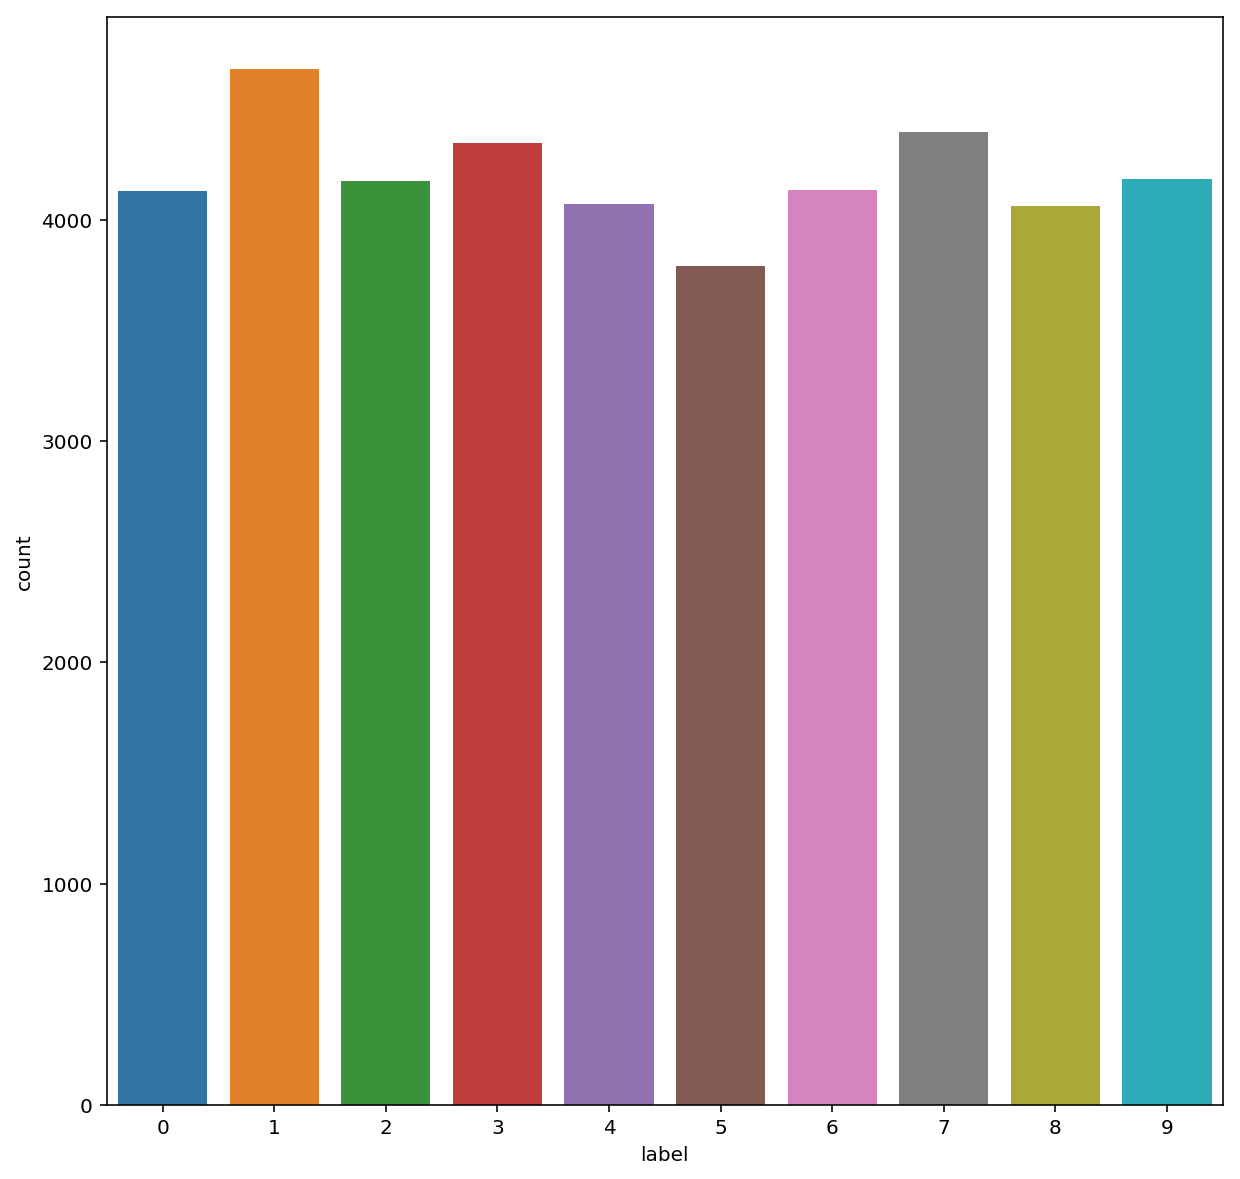

In [12]:
target = train["label"]
train = train.drop("label",1)
g = sns.countplot(target)
target.value_counts()

<b>
The histogram illustrates the count of digits in the training data for each number. It is used to visualize if there is an unequal sample size among the digits. Since the sample size for each digit appears to be comparable we have no issue of unequal sampling. 
</b>

### Data Visualization

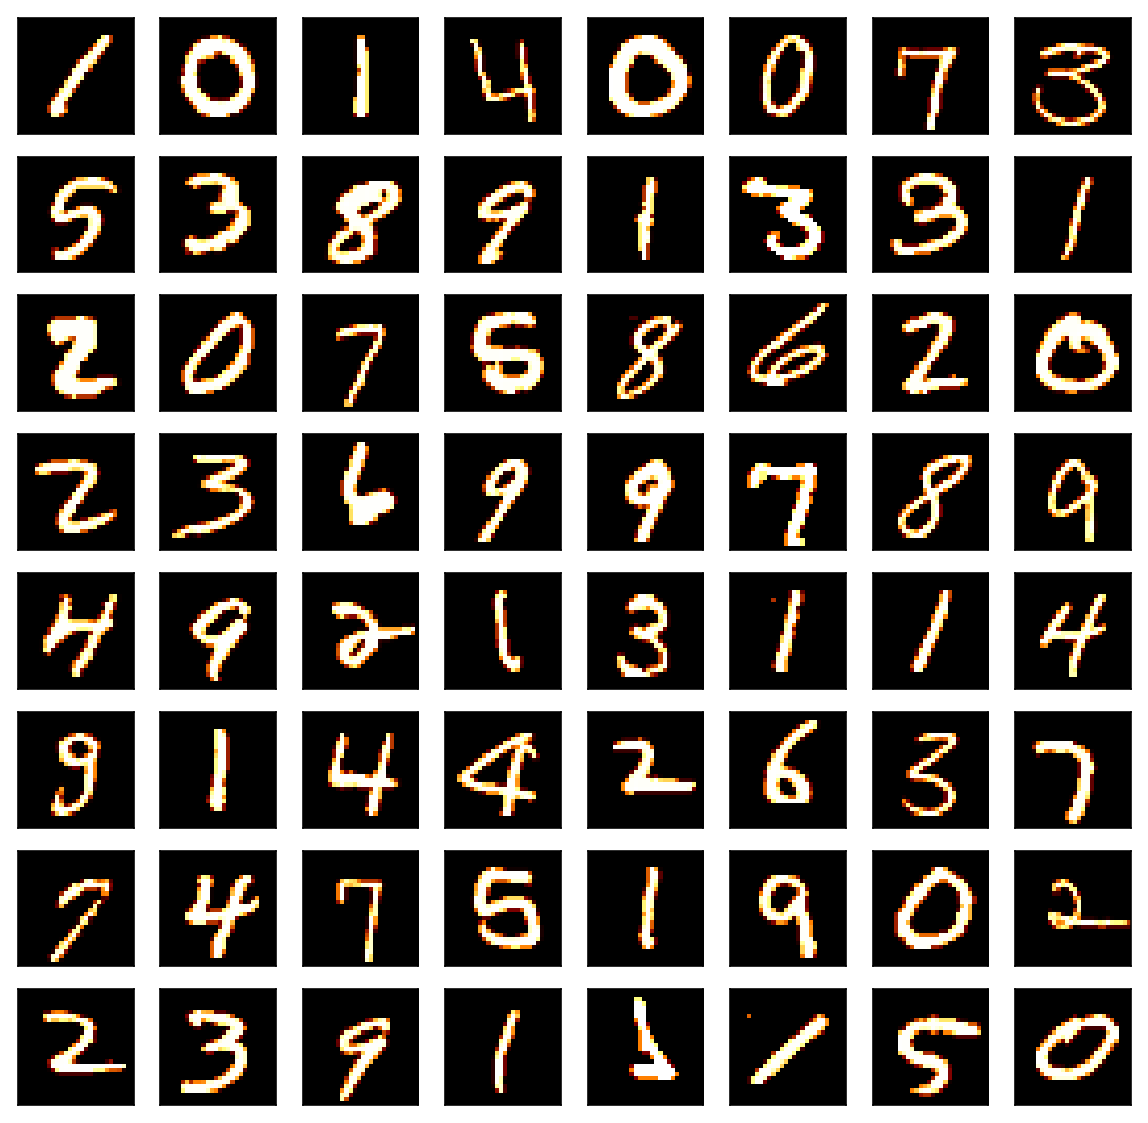

In [13]:
figure(figsize(10, 10))
for digit_num in range(0, 64):
    subplot(8, 8, digit_num + 1)
    grid_data = train.iloc[digit_num].as_matrix().reshape(28, 28)  # reshape from 1d to 2d pixel array
    plt.imshow(grid_data, interpolation = "none", cmap = "afmhot")
    xticks([])
    yticks([])

In [ ]:
Tsne_data = TSNE().fit_transform(train)
plt.figure(figsize(6, 5))
plt.scatter(Tsne_data[: , 0], Tsne_data[: , 1], s = 20, c = target, cmap = "nipy_spectral", edgecolor = "None")
plt.colorbar()
clim(0, 9)

xlabel("t-SNE feature 1")
ylabel("t-SNE feature 2")

### Null value check 

In [14]:
train.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

In [15]:
test.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

#### It is evident that train and test set does not have any null values in the dataset. All the values are unique and the data type is object. 

### Normalization to minimize the illumination difference

In [16]:
train = train / 255.0
test = test / 255.0

<b>
Illumination is important in image processing. To clearly illustrate the image we need to consider the light and shadow visiblility in our image. We do normalization to minimize the illumination differnce among the numbers and make the data available among particluar range to proceed with the further modeling of our dataset. Data Normalization is also essential to reduce and eliminate redundancy. To fit the original colors of the digits we are using 0 to 255 grayscale value instead of 0 to 1. This will be useful for data visualization of the numbers. Since the data here is pixel values we cannot normalize it like we do for a set of observation data, hence we normalize the data with respecct to the grayscale value for a better visualization effect.
</b>

### PCA

Text(0,0.5,'PC2')

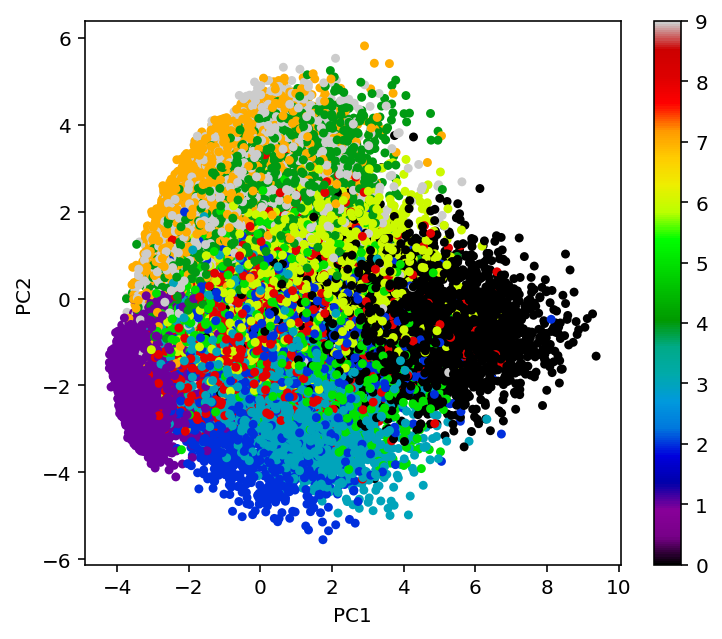

In [17]:
pca = PCA(n_components = 2)
pca.fit(train)
transform = pca.transform(train)

plt.figure(figsize(6, 5))
plt.scatter(transform[: , 0],transform[: , 1], s = 20, c = target, cmap = "nipy_spectral", edgecolor = "None")
plt.colorbar()
clim(0, 9)

xlabel("PC1")
ylabel("PC2")

Text(0,0.5,'variance ratio')

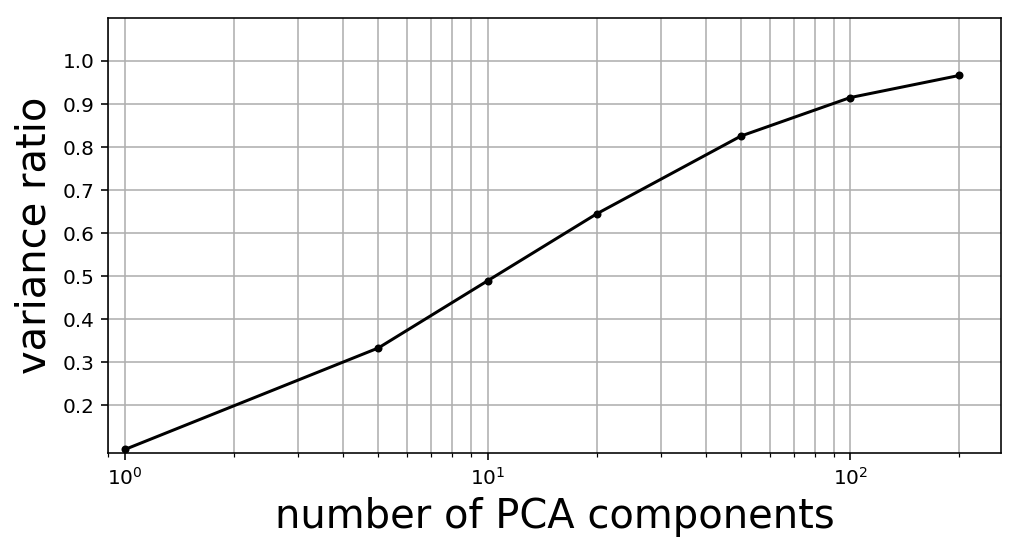

In [18]:
n_components_array = ([1, 5, 10, 20, 50, 100, 200])
vr = np.zeros(len(n_components_array))
i = 0;
for n_components in n_components_array:
    pca = PCA(n_components = n_components)
    pca.fit(train)
    vr[i] = sum(pca.explained_variance_ratio_)
    i = i + 1 

figure(figsize(8, 4))
plot(n_components_array,vr, 'k.-')
xscale("log")
ylim(9e-2, 1.1)
yticks(linspace(0.2, 1.0, 9))
xlim(0.9)
grid(which = "both")
xlabel("number of PCA components", size = 20)
ylabel("variance ratio", size = 20)

<b>
We see that 100 components are needed to capture 90% of the variance in the data. It’s a big amount of components. We’ll not do that much. Next, we will train a KNN classifier on the PCA output and figure out the best component number for PCA.
</b>

In [ ]:
# function for evaluating classifiers
def classifier_evaluation(classifier, X_trainval, Y_trainval):
    X_train, X_valid, Y_train, Y_valid = train_test_split(X_trainval, Y_trainval, random_state = 0)
    classifier.fit(X_train, Y_train)
    return classifier.score(X_valid, Y_valid)

### PCA Components with KNN

In [ ]:
clf = KNeighborsClassifier()
n_components_array = ([1, 5, 10, 20, 50, 100, 200, 500])
score_array = np.zeros(len(n_components_array))
i = 0

for n_components in n_components_array:
    pca = PCA(n_components = n_components)
    pca.fit(train)
    transform = pca.transform(train)
    score_array[i] = classifier_evaluation(clf, transform, target)
    i = i + 1

In [ ]:
figure(figsize(8, 4))
plot(n_components_array, score_array, 'k.-')
xscale('log')
xlabel("number of PCA components", size = 20)
ylabel("accuracy", size = 20)
grid(which = "both")

<b>
The accuracy seems to saturate at 0.95 for 50 PCA components. In fact, the accuracy even seems to drop for much larger numbers, even though a larger number of PCA components captures more of the variance in the data, as seen in the plot above. The drop in accuracy is probably due to overfitting. Thus, we choose 50 as component number.
</b>

In [19]:
pca = PCA(n_components = 50)
pca.fit(train)
transform_train = pca.transform(train)
transform_test = pca.transform(test)

### Fitting Models with PCA data

In [20]:
# split PCA transformed data into train and validation data sets
X_train, X_test, Y_train, Y_test = train_test_split(transform_train, target, random_state = 0)

In [21]:
print(X_train.shape)
print(X_test.shape)

(31500, 50)
(10500, 50)


#### 1. KNN

In [20]:
knn_best = 0
knn_kfolds = 5
for k in [1, 5, 10, 15]:
    knnModel = KNeighborsClassifier(n_neighbors = k)   
    knn_scores = cross_val_score(knnModel, X_train, Y_train, cv = knn_kfolds)
    score = np.mean(knn_scores)
    if score > knn_best:
        knn_best = score
        best_k = k
selected_knn = KNeighborsClassifier(n_neighbors = best_k).fit(X_train, Y_train)
knn_accuracy = selected_knn.score(X_test, Y_test)

print ("The best k is: ", best_k)
print ("The best accurary of the model is ", knn_accuracy)

The best k is:  5
The best accurary of the model is  0.9719047619047619


In [24]:
knn_pred = selected_knn.predict(X_test)
knn_confusion = confusion_matrix(Y_test, knn_pred)
print("confusion matrix:")
print(knn_confusion)
print("The precision of KNN is: ", precision_score(Y_test, knn_pred, average = None))
print("The recall of KNN is: ", recall_score(Y_test, knn_pred, average = None))

confusion matrix:
[[1003    0    3    0    0    2    5    0    2    0]
 [   0 1180    7    0    0    0    0    1    1    1]
 [   7    4 1049    1    0    0    2    9    5    0]
 [   1    1    9 1034    0    6    0    5    8    6]
 [   1    6    0    0  992    0    6    1    0   28]
 [   2    1    1    9    2  899   14    0    2    0]
 [   2    0    0    0    0    6 1036    0    0    0]
 [   1    9    6    1    4    0    0 1097    0   11]
 [   3    4    1   17    2   11    6    0  943    8]
 [   4    1    2    3   11    4    2   16    1  972]]
The precision of KNN is:  [0.97949219 0.97844113 0.97309833 0.97089202 0.98120673 0.96875
 0.96732026 0.97165633 0.98024948 0.94736842]
The recall of KNN is:  [0.98817734 0.99159664 0.97400186 0.96635514 0.95938104 0.96666667
 0.99233716 0.97165633 0.94773869 0.95669291]


#### 2. Decision Tree

In [25]:
DT_best = 0
DT_kfolds = 5
for max_depth in [10, 20, 40, 60, 80, 100]:
    treeModel = DecisionTreeClassifier(max_depth = max_depth)   
    DT_scores = cross_val_score(treeModel, X_train, Y_train, cv = DT_kfolds)
    score = np.mean(DT_scores)
    if score > DT_best:
        DT_best = score
        best_depth = max_depth
selected_DT = DecisionTreeClassifier(max_depth = best_depth).fit(X_train,Y_train)
DT_accuracy = selected_DT.score(X_test, Y_test)

print ("The best depth is: ", best_depth)
print ("The best accurary of the model is ", DT_accuracy)

The best depth is:  20
The best accurary of the model is  0.8345714285714285


In [26]:
dt_pred = selected_DT.predict(X_test)
dt_confusion = confusion_matrix(Y_test, dt_pred)
print("confusion matrix:")
print(dt_confusion)
print("The precision of Decision Tree is: ", precision_score(Y_test, dt_pred, average = None))
print("The recall of Decision Tree is: ", recall_score(Y_test, dt_pred, average = None))

confusion matrix:
[[ 919    0   13   14    8   18   18    5   11    9]
 [   1 1144   10    9    1    7    6    2    9    1]
 [  24    6  892   29   17   13   24   19   37   16]
 [   7    5   32  872    3   62   11   17   51   10]
 [   2    5   18    7  813   15   15   21   27  111]
 [  17    5   16   62   18  715   21    5   49   22]
 [  32    6   18    7   16   29  915    4   13    4]
 [   1    9   27   16   34    9    6  959    9   59]
 [  18   12   26   68   14   49   17   17  755   19]
 [  12    6   15   10   76   31   10   49   28  779]]
The precision of Decision Tree is:  [0.88964182 0.95492487 0.83598875 0.79707495 0.813      0.75421941
 0.87727709 0.87340619 0.76339737 0.75631068]
The recall of Decision Tree is:  [0.90541872 0.96134454 0.82822656 0.81495327 0.78626692 0.7688172
 0.87643678 0.84942427 0.75879397 0.76673228]


#### 3. Neural Network

In [27]:
MLPmodel = MLPClassifier(solver = 'lbfgs', max_iter = 5000, activation = 'tanh', random_state = 10, 
                              hidden_layer_sizes = [10, 5], alpha = 0.5).fit(X_train, Y_train)
MLP_score = MLPmodel.score(X_test, Y_test)
print("the accuracy of this model is: ", MLP_score)

the accuracy of this model is:  0.938


In [28]:
nn_pred = MLPmodel.predict(X_test)
nn_confusion = confusion_matrix(Y_test, nn_pred)
print("confusion matrix:")
print(nn_confusion)
print("The precision of Neural Network is: ", precision_score(Y_test, nn_pred, average = None))
print("The recall of Neural Network is: ", recall_score(Y_test, nn_pred, average = None))

confusion matrix:
[[ 980    0    4    3    5    8    7    1    6    1]
 [   0 1166    7    2    1    4    0    5    3    2]
 [  10    3 1009   12    3    2   14    9   11    4]
 [   5    2   10  981    0   26    6   11   20    9]
 [   3    5    1    0  969    0   14    5    3   34]
 [   8    2    2    7    8  869   17    1    9    7]
 [  12    1    5    0    8    3 1008    0    7    0]
 [   5    9   22    2   12    4    0 1047    0   28]
 [   5    7    7   30    0   11   12    1  902   20]
 [  10    2    7    3   31    9    0   27    9  918]]
The precision of Neural Network is:  [0.94412331 0.97410192 0.93947858 0.94326923 0.93442623 0.9284188
 0.93506494 0.94579946 0.92989691 0.8973607 ]
The recall of Neural Network is:  [0.96551724 0.97983193 0.93686165 0.91682243 0.93713733 0.9344086
 0.96551724 0.92736935 0.90653266 0.90354331]


#### 4. Random Forest

In [29]:
RF_best = 0
RF_kfolds = 5
for n_estimator in [10, 50, 100, 150, 200]:
    forestModel = RandomForestClassifier(n_estimators = n_estimator, max_features = 'auto', max_depth = None, random_state = 10)
    RF_scores = cross_val_score(forestModel, X_train, Y_train, cv = RF_kfolds)
    score = np.mean(RF_scores)
    if score > DT_best:
        RF_best = score
        best_estimator = n_estimator
selected_RF = RandomForestClassifier(n_estimators = best_estimator, max_features = 'auto', 
                                             max_depth = None, random_state = 10).fit(X_train,Y_train)
RF_accuracy = selected_RF.score(X_test, Y_test)

print ("The best number of estimator is: ", best_estimator)
print ("The best accurary of the model is ", RF_accuracy)

The best number of estimator is:  200
The best accurary of the model is  0.9501904761904761


In [30]:
rf_pred = selected_RF.predict(X_test)
rf_confusion = confusion_matrix(Y_test, rf_pred)
print("confusion matrix:")
print(rf_confusion)
print("The precision of Random Forest is: ", precision_score(Y_test, rf_pred, average = None))
print("The recall of Random Forest is: ", recall_score(Y_test, rf_pred, average = None))

confusion matrix:
[[ 987    0    5    3    2    1   13    0    4    0]
 [   0 1166   13    4    0    1    2    1    3    0]
 [   7    1 1022   15    5    1    3    7   13    3]
 [   3    0   16  988    0   15    6    7   22   13]
 [   1    6    3    1  979    0    8    2    5   29]
 [   2    0    2   18    3  892    8    0    3    2]
 [   5    1    0    0    3   12 1022    0    1    0]
 [   2    8   14    1    6    0    1 1078    3   16]
 [   2    4    6   29    3   25    9    4  907    6]
 [   5    2    6   12   21    6    1   21    6  936]]
The precision of Random Forest is:  [0.97337278 0.98148148 0.94020239 0.92250233 0.95792564 0.93599161
 0.95246971 0.9625     0.93795243 0.93134328]
The recall of Random Forest is:  [0.97241379 0.97983193 0.94893222 0.92336449 0.94680851 0.95913978
 0.9789272  0.95482728 0.91155779 0.92125984]


#### 5. AdaBoost

In [31]:
boostModel = AdaBoostClassifier(RandomForestClassifier(max_depth = None), algorithm="SAMME", n_estimators = 200).fit(X_train, Y_train)
boost_score = boostModel.score(X_test, Y_test)
print("the accuracy of this model is: ", boost_score)

the accuracy of this model is:  0.9602857142857143


In [32]:
ada_pred = boostModel.predict(X_test)
ada_confusion = confusion_matrix(Y_test, ada_pred)
print("confusion matrix:")
print(ada_confusion)
print("The precision of AdaBoost is: ", precision_score(Y_test, ada_pred, average = None))
print("The recall of AdaBoost is: ", recall_score(Y_test, ada_pred, average = None))

confusion matrix:
[[ 991    0    2    2    3    1   11    0    5    0]
 [   0 1163   14    0    2    3    2    2    3    1]
 [   4    0 1040    8    0    0    0    8   16    1]
 [   2    0   13 1010    0   13    1    5   17    9]
 [   1    5    3    0  989    1    3    3    1   28]
 [   1    0    2   13    3  899    7    0    4    1]
 [   4    0    0    1    1   13 1024    0    1    0]
 [   2    5   14    2    6    1    0 1078    2   19]
 [   2    3    4   26    5   17    5    2  928    3]
 [   6    1    3    9   13    3    0   15    5  961]]
The precision of AdaBoost is:  [0.97828233 0.98810535 0.94977169 0.94304388 0.96771037 0.94532072
 0.97245964 0.96855346 0.94501018 0.93939394]
The recall of AdaBoost is:  [0.97635468 0.97731092 0.96564531 0.94392523 0.95647969 0.96666667
 0.98084291 0.95482728 0.93266332 0.94586614]


#### 6. SVM

In [33]:
best_score = 0 
kfolds = 5
for C in [0.1, 1, 5, 10]:
    for gamma in [0.1, 1, 5]:
        svm_model = SVC(kernel = 'rbf', gamma = gamma, C = C).fit(X_train, Y_train)
        svm_scores = cross_val_score(svm_model, X_train, Y_train, cv = kfolds)
        score = np.mean(svm_scores)
        if score > best_score:
            best_score = score
            best_gamma = gamma
            best_c = C
selected_svm = SVC(C = best_c, gamma = best_gamma).fit(X_train, Y_train)
svm_accuracy = selected_svm.score(X_test, Y_test)

print ("The best gamma is: ", best_gamma)
print ("The best C is: ", best_c)
print ("The best accurary of the model is ", svm_accuracy)

The best gamma is:  0.1
The best C is:  5
The best accurary of the model is  0.9792380952380952


In [34]:
svm_pred = selected_svm.predict(X_test)
svm_confusion = confusion_matrix(Y_test, svm_pred)
print("confusion matrix:")
print(svm_confusion)
print("The precision of SVM is: ", precision_score(Y_test, svm_pred, average = None))
print("The recall of SVM is: ", recall_score(Y_test, svm_pred, average = None))

confusion matrix:
[[ 999    0    4    1    1    2    4    0    3    1]
 [   0 1173   11    1    0    0    0    2    3    0]
 [   1    0 1063    1    0    0    0    4    8    0]
 [   0    0    9 1039    0    8    0    2   10    2]
 [   1    3    4    0 1011    1    2    1    0   11]
 [   1    0    2    5    1  916    3    0    1    1]
 [   2    0    3    0    1    5 1031    0    2    0]
 [   1    5   15    3    2    0    0 1096    2    5]
 [   1    1    4    9    0    3    2    0  975    0]
 [   3    1    5    4    6    1    1    9    7  979]]
The precision of SVM is:  [0.9900892  0.99154691 0.94910714 0.97742239 0.98923679 0.97863248
 0.98849473 0.98384201 0.96439169 0.97997998]
The recall of SVM is:  [0.98423645 0.98571429 0.98700093 0.97102804 0.97775629 0.98494624
 0.98754789 0.97077059 0.9798995  0.96358268]


### Model Performance

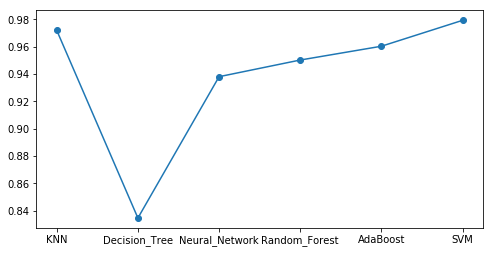

In [36]:
names = ["KNN", "Decision_Tree", "Neural_Network", "Random_Forest", "AdaBoost", "SVM"]
results = [knn_accuracy, DT_accuracy, MLP_score, RF_accuracy, boost_score, svm_accuracy]
plt.plot(names, results, '-o')
plt.show()

<b>
We found that the best model is SVM (C = 5, gamma = 0.1) by comparing all the accuracy, precision and recall values. We'll fit this model on test data set and submit the result to Kaggle. We will also submit the results of all the other models above to check the scores.
</b>

### Prepare Submit File

In [ ]:
#knn_submit = selected_knn.predict(transform_test)
#dt_submit = selected_DT.predict(transform_test)
#MLP_submit = MLPmodel.predict(transform_test)
#rf_submit = selected_RF.predict(transform_test)
#boost_submit = boostModel.predict(transform_test)
svm_submit = selected_svm.predict(transform_test)

In [ ]:
res_submit = pd.Series(boost_submit, name = "Label")
submission = pd.concat([pd.Series(range(1, len(test) + 1), name = "ImageId"), res_submit], axis = 1)
submission.to_csv("submission.csv", index = False)

### Kaggle Performance

In [37]:
model_names = ["KNN", "Decision_Tree", "Neural_Network", "Random_Forest", "AdaBoost", "SVM"]
perf_arr = np.array([0.97285, 0.82985, 0.93228, 0.94814, 0.96242, 0.97942])
all_df = pd.DataFrame(perf_arr, columns = ["Kaggle Performance"])
all_df.insert(loc = 0, column = 'Model_names', value = model_names)
all_df

,Model_names,Kaggle Performance
0,KNN,0.97285
1,Decision_Tree,0.82985
2,Neural_Network,0.93228
3,Random_Forest,0.94814
4,AdaBoost,0.96242
5,SVM,0.97942
